<a href="https://colab.research.google.com/github/PabloAA007/ATSO-Algorithmic-Trading-Strategy-Optimization/blob/nick/Prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet
!pip install hvplot
!pip install holoviews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import datetime as dt
import holoviews as hv
from prophet import Prophet

%matplotlib inline

In [ ]:
# Upload the bitcoin_hourly.csv file
from google.colab import files
uploaded = files.upload()

Saving AAPL_stock_price.csv to AAPL_stock_price (1).csv


In [ ]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("AAPL_stock_price.csv",
                 index_col="Date",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Drop columns that won't be used
df = df.drop(columns=["Open", "High", "Low", "Volume"], axis=1)

# Preview the dataset
df.head()

,Close
Date,
2020-07-27,94.81
2020-07-28,93.25
2020-07-29,95.04
2020-07-30,96.19
2020-07-31,106.26


<Axes: xlabel='Date'>

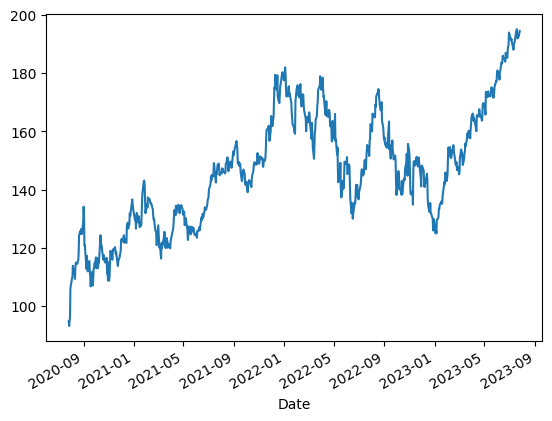

In [ ]:
df["Close"].plot()

In [ ]:
# Reset the index so that we recode the columns for Prophet
df = df.reset_index()

In [ ]:
df.columns = ["ds", "y"]

In [ ]:
# Sort the DataFrame by `ds` in ascending order
df = df.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(df.head(10))
display(df.tail(10))

,ds,y
0,2020-07-27,94.81
1,2020-07-28,93.25
2,2020-07-29,95.04
3,2020-07-30,96.19
4,2020-07-31,106.26
5,2020-08-03,108.94
6,2020-08-04,109.67
7,2020-08-05,110.06
8,2020-08-06,113.90
9,2020-08-07,111.11


,ds,y
745,2023-07-13,190.54
746,2023-07-14,190.69
747,2023-07-17,193.99
748,2023-07-18,193.73
749,2023-07-19,195.10
750,2023-07-20,193.13
751,2023-07-21,191.94
752,2023-07-24,192.75
753,2023-07-25,193.62
754,2023-07-26,194.50


In [ ]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [ ]:
# Fit the Prophet model.
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzwqawy36/i7hp52c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzwqawy36/6sm2k4c9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42559', 'data', 'file=/tmp/tmpzwqawy36/i7hp52c2.json', 'init=/tmp/tmpzwqawy36/6sm2k4c9.json', 'output', 'file=/tmp/tmpzwqawy36/prophet_modelkh332ws2/prophet_model-20230727234847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:48:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:48:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model.make_future_dataframe(periods=36, freq="M")

# View the last five rows of the predictions
future_trends.tail()

,ds
786,2026-02-28
787,2026-03-31
788,2026-04-30
789,2026-05-31
790,2026-06-30


In [ ]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-27,98.901067,96.862648,110.919497,98.901067,98.901067,4.631499,4.631499,4.631499,1.010253,1.010253,1.010253,3.621245,3.621245,3.621245,0.0,0.0,0.0,103.532566
1,2020-07-28,99.068422,96.626712,110.889846,99.068422,99.068422,4.980332,4.980332,4.980332,0.857521,0.857521,0.857521,4.122811,4.122811,4.122811,0.0,0.0,0.0,104.048754
2,2020-07-29,99.235776,97.331740,111.550992,99.235776,99.235776,5.526182,5.526182,5.526182,0.871431,0.871431,0.871431,4.654752,4.654752,4.654752,0.0,0.0,0.0,104.761959
3,2020-07-30,99.403131,98.422611,112.195469,99.403131,99.403131,6.066160,6.066160,6.066160,0.850814,0.850814,0.850814,5.215347,5.215347,5.215347,0.0,0.0,0.0,105.469291
4,2020-07-31,99.570485,99.242624,112.722153,99.570485,99.570485,6.647302,6.647302,6.647302,0.845185,0.845185,0.845185,5.802117,5.802117,5.802117,0.0,0.0,0.0,106.217788


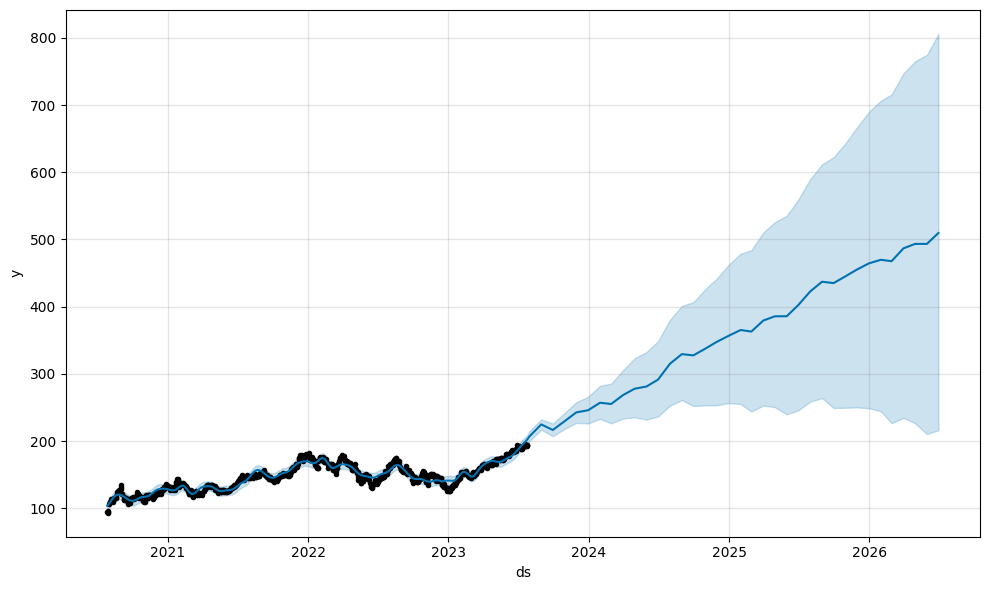

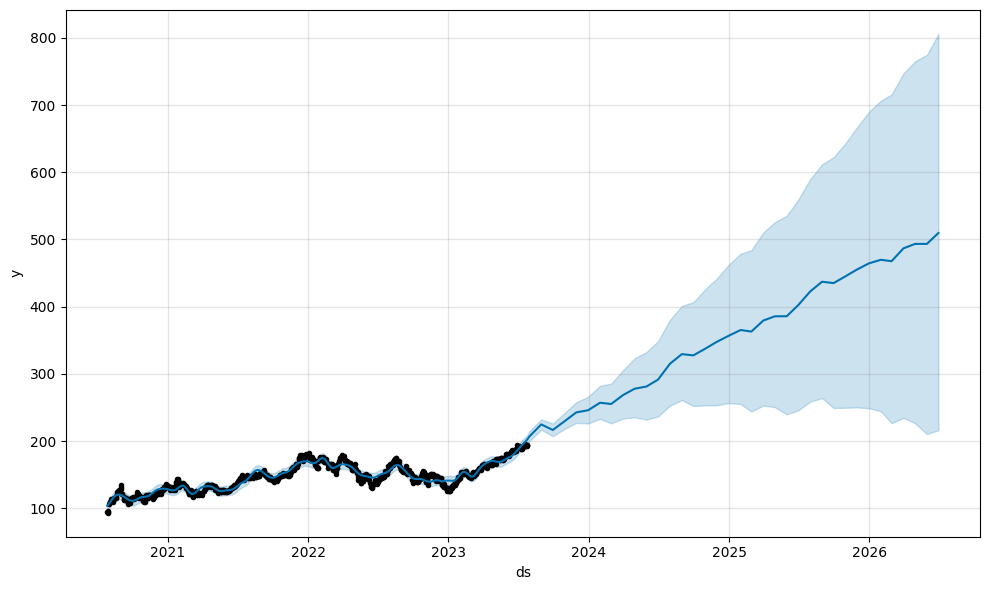

In [ ]:
model.plot(forecast_trends)

In [ ]:
forecast_trends = forecast_trends.set_index(["ds"])
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2020-07-27,98.901067,96.862648,110.919497,98.901067,98.901067,4.631499,4.631499,4.631499,1.010253,1.010253,1.010253,3.621245,3.621245,3.621245,0.0,0.0,0.0,103.532566
2020-07-28,99.068422,96.626712,110.889846,99.068422,99.068422,4.980332,4.980332,4.980332,0.857521,0.857521,0.857521,4.122811,4.122811,4.122811,0.0,0.0,0.0,104.048754
2020-07-29,99.235776,97.331740,111.550992,99.235776,99.235776,5.526182,5.526182,5.526182,0.871431,0.871431,0.871431,4.654752,4.654752,4.654752,0.0,0.0,0.0,104.761959
2020-07-30,99.403131,98.422611,112.195469,99.403131,99.403131,6.066160,6.066160,6.066160,0.850814,0.850814,0.850814,5.215347,5.215347,5.215347,0.0,0.0,0.0,105.469291
2020-07-31,99.570485,99.242624,112.722153,99.570485,99.570485,6.647302,6.647302,6.647302,0.845185,0.845185,0.845185,5.802117,5.802117,5.802117,0.0,0.0,0.0,106.217788
